In [1]:
""" reading the generated csv file for collated 
 bounding boxes, removing outliers and identifying avg dim of bounding box. Also individual
 centres of each video """

import pandas as pd
import math
collated_box = pd.read_csv("C:/Users/Kanav/Documents/Dissertation/Parkinsons_Disease/Codes/Boundingbox_dim_files/collated_files.csv")


In [2]:
print("Problem with YC07_R_10s_lowfps.mp4. The hand detection could detect only on 1 frame. Resolve later") 
a = collated_box[collated_box["filename"]=="YC07_R_10s_lowfps.mp4"]["xmin"].std()
print(a)

Problem with YC07_R_10s_lowfps.mp4. The hand detection could detect only on 1 frame. Resolve later
nan


array([[<AxesSubplot:title={'center':'xmin'}>,
        <AxesSubplot:title={'center':'ymin'}>],
       [<AxesSubplot:title={'center':'xmax'}>,
        <AxesSubplot:title={'center':'ymax'}>]], dtype=object)

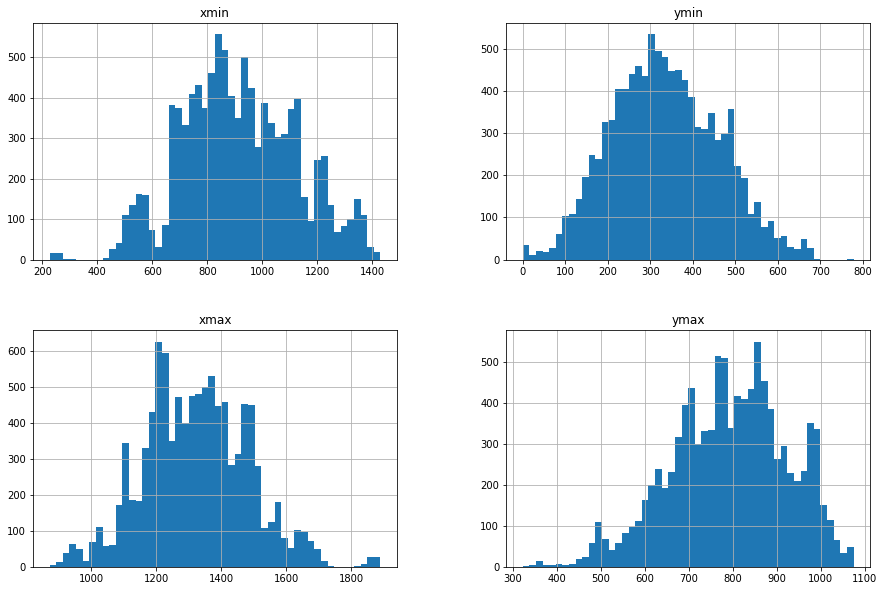

In [8]:
#histogram plots befor any outlier adjustment
collated_box[["xmin", "ymin","xmax", "ymax"]] = collated_box[["xmin", "ymin","xmax", "ymax"]].apply(pd.to_numeric)

#collated_box["area"] = (collated_box["xmax"]-collated_box["xmin"]) * (collated_box["ymax"]-collated_box["ymin"])
collated_box.iloc[:,1:5].hist(bins=50,figsize=(15,10))


In [6]:
def remove_outliers_each_video(df,video_name, filter_col, num_columns,n_std):
    temp = pd.DataFrame(columns=df.columns)
    df_orig = df
    for video in video_name :
        df = df_orig.loc[df_orig[filter_col] == video]
        for col in num_columns:
            #print(f'Working on video: {video} & column: {col}')

            mean = df[col].mean()
            sd = df[col].std()
            ## making special cut for videos with only 1 detected frame. Need to correct this by improving hand detection model
            if math.isnan(sd): 
                sd = 0
            #filtering columns based on distance from standard deviation
            df = df[(df[col] <= mean+(n_std*sd))]
        temp = pd.concat([temp,df], axis = 0)
        
    return temp


video_name = collated_box["filename"].unique()
columns =  collated_box.columns[1:5]
filter_col = collated_box.columns[0]


updated_box = remove_outliers_each_video(collated_box, video_name, filter_col, columns, 2) #removing 2 std deviations from mean


just checking max min values of OC03_R_10s_lowfps bounding box
1661
1139


array([[<AxesSubplot:title={'center':'xmin'}>,
        <AxesSubplot:title={'center':'ymin'}>],
       [<AxesSubplot:title={'center':'xmax'}>,
        <AxesSubplot:title={'center':'ymax'}>]], dtype=object)

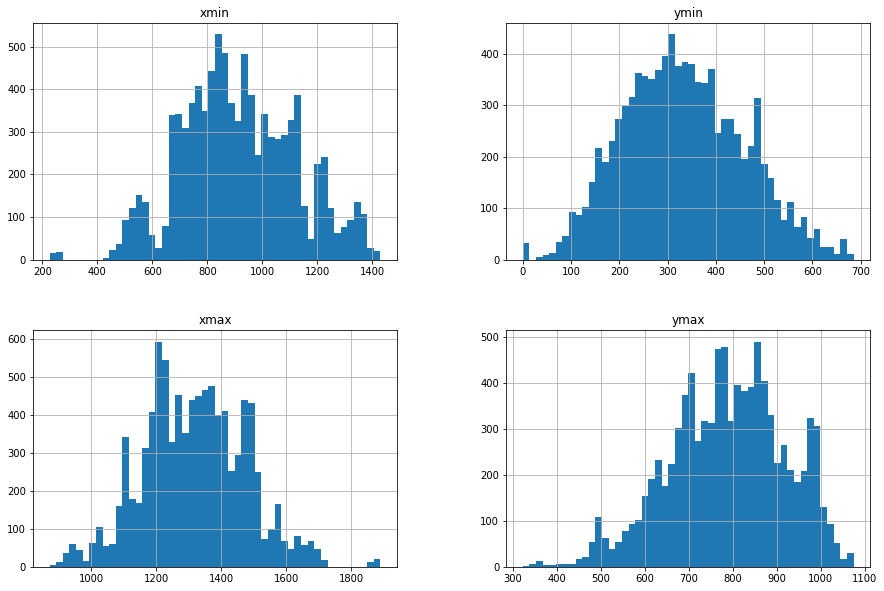

In [9]:
import matplotlib.pyplot as plt

updated_box.head()
#random tests to check max value 
print("just checking max min values of OC03_R_10s_lowfps bounding box")
print(collated_box.loc[collated_box["filename"]=="OC03_R_10s_lowfps.mp4", "xmax"].max())
print(updated_box.loc[updated_box["filename"]=="OC03_R_10s_lowfps.mp4", "xmax"].max())

#histogram plots
updated_box[["xmin", "ymin","xmax", "ymax"]] = updated_box[["xmin", "ymin","xmax", "ymax"]].apply(pd.to_numeric)

#updated_box["area"] = (updated_box["xmax"]-updated_box["xmin"]) * (updated_box["ymax"]-updated_box["ymin"])

updated_box.iloc[:,1:5].hist(bins=50,figsize=(15,10))

In [6]:
## 2 problem with ymin & xmax 
print(updated_box.loc[updated_box["ymin"]==0, "filename"].unique())
print(updated_box.loc[updated_box["xmax"]>=1800, "filename"].unique())

                  filename  xmin  ymin  xmax  ymax
8064  P63_R_10s_lowfps.mp4   272     0  1861   828
8073  P63_R_10s_lowfps.mp4   260     0  1886   784
8074  P63_R_10s_lowfps.mp4   255     0  1875   801
8075  P63_R_10s_lowfps.mp4   251     0  1883   793
8076  P63_R_10s_lowfps.mp4   272     0  1876   826
8083  P63_R_10s_lowfps.mp4   250     0  1858   819
8084  P63_R_10s_lowfps.mp4   254     0  1857   822
8091  P63_R_10s_lowfps.mp4   243     0  1868   807
8092  P63_R_10s_lowfps.mp4   228     0  1876   774
8093  P63_R_10s_lowfps.mp4   242     0  1885   774
8101  P63_R_10s_lowfps.mp4   253     0  1874   805
8110  P63_R_10s_lowfps.mp4   267     0  1867   812
8111  P63_R_10s_lowfps.mp4   253     0  1862   812
8112  P63_R_10s_lowfps.mp4   249     0  1864   809
8120  P63_R_10s_lowfps.mp4   267     0  1875   810
8121  P63_R_10s_lowfps.mp4   238     0  1865   798
8128  P63_R_10s_lowfps.mp4   271     0  1870   834
8129  P63_R_10s_lowfps.mp4   252     0  1889   779
8130  P63_R_10s_lowfps.mp4   23

In [10]:
#so same file with both issues. We will not consider this file for finding min and max
updated_box_all = updated_box.copy()
updated_box = updated_box[updated_box["filename"] != "P63_R_10s_lowfps.mp4"]

array([[<AxesSubplot:title={'center':'xmin'}>,
        <AxesSubplot:title={'center':'ymin'}>],
       [<AxesSubplot:title={'center':'xmax'}>,
        <AxesSubplot:title={'center':'ymax'}>]], dtype=object)

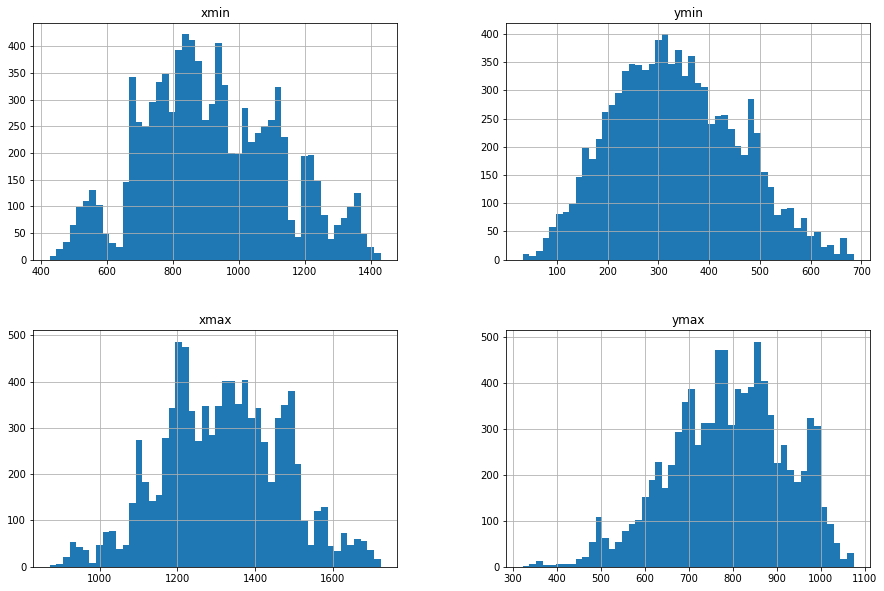

In [11]:
#checking histogram again
updated_box.iloc[:,1:5].hist(bins=50,figsize=(15,10))

In [55]:
# finding largest bounding box
updated_box["width"] = updated_box["xmax"] - updated_box["xmin"]  
updated_box["height"] = updated_box["ymax"] - updated_box["ymin"]  
updated_box["box_area"] = updated_box["width"].mul(updated_box["height"] )

In [56]:
## checking the max dimensions 
updated_box[updated_box["box_area"] == updated_box["box_area"].max()]

,filename,xmin,ymin,xmax,ymax,width,height,box_area
6595,P50_R_10s_lowfps.mp4,676,86,1355,993,679,907,615853


In [57]:
# checking by individual dimensions
print(updated_box["width"].max())
print(updated_box["height"].max())

776
907


In [58]:
# Both are very similar. so keeping dimesnions as 780*920 (keeping larger one as indicated by individual width) 
print("width*height: 780*910")
width_updt, height_updt = 780,910

width*height: 780*910


In [59]:
updated_box.head()

,filename,xmin,ymin,xmax,ymax,width,height,box_area
0,OC01_R_10s_lowfps.mp4,556,470,940,931,384,461,177024
1,OC01_R_10s_lowfps.mp4,556,466,937,932,381,466,177546
2,OC01_R_10s_lowfps.mp4,558,459,941,930,383,471,180393
3,OC01_R_10s_lowfps.mp4,559,457,938,925,379,468,177372
4,OC01_R_10s_lowfps.mp4,552,460,940,929,388,469,181972


In [60]:
# updating coordinates of files for ALL Videos (including P63)
updated_box_all["x_centre"] = (updated_box_all["xmin"] + updated_box_all["xmax"])/2
updated_box_all["y_centre"] = (updated_box_all["ymin"] + updated_box_all["ymax"])/2

In [61]:
### Generating new xmin,ymin 

# Finding average centre values for each file 
for video in updated_box_all["filename"].unique():
    updated_box_all.loc[updated_box_all["filename"] == video, "x_centre_avg"] = int(updated_box_all.loc[updated_box_all["filename"] == video, "x_centre"].mean())
    updated_box_all.loc[updated_box_all["filename"] == video, "y_centre_avg"] = int(updated_box_all.loc[updated_box_all["filename"] == video, "y_centre"].mean())

updated_box_all["new_xmin"] = updated_box_all["x_centre_avg"] - (width_updt/2)
updated_box_all["new_ymin"] = updated_box_all["y_centre_avg"] - (height_updt/2)

# no need to find xmax and ymax
#updated_box_all["new_xmax"] = updated_box_all["x_centre_avg"] + (780/2)
#updated_box_all["new_ymax"] = updated_box_all["y_centre_avg"] + (920/2)

array([[<AxesSubplot:title={'center':'new_xmin'}>,
        <AxesSubplot:title={'center':'new_ymin'}>]], dtype=object)

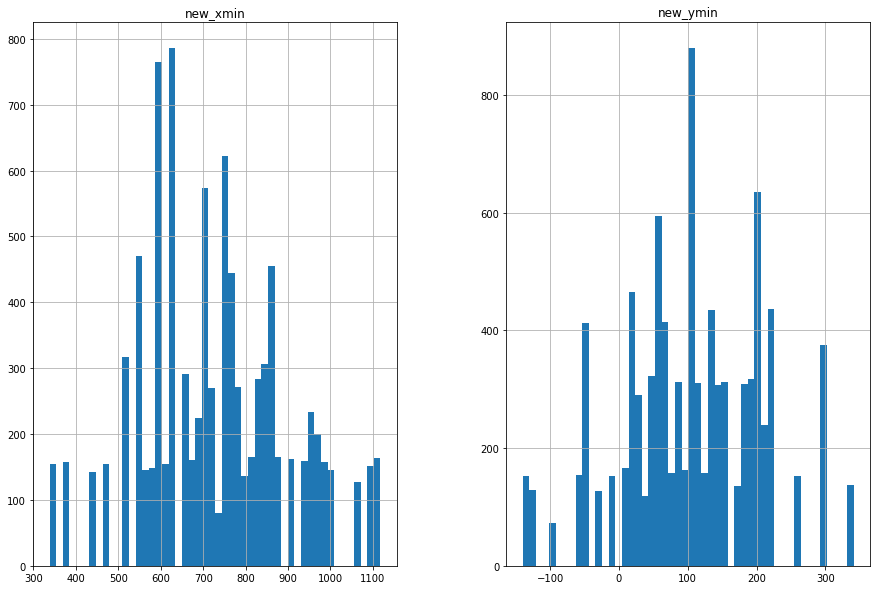

In [62]:
updated_box_all.iloc[:,9:11].hist(bins=50,figsize=(15,10))

In [63]:
##Need to adjust xmin & ymin as per dimentions of box 780*910
print("dimension of box is 780*910")
print("So, xmin has the range of [0,1140]") # as max is 1920
print("And, ymin has the range of [0,170]") # as max is 1080

dimension of box is 780*910
So, xmin has the range of [0,1140]
And, ymin has the range of [0,170]


In [64]:
##updating the cases where the coordinates go out of frame.
updated_box_all.loc[updated_box_all["new_xmin"]<0, "new_xmin"] = 0
updated_box_all.loc[updated_box_all["new_xmin"]>1140, "new_xmin"] = 1140
updated_box_all.loc[updated_box_all["new_ymin"]<=0, "new_ymin"] = 0
updated_box_all.loc[updated_box_all["new_ymin"]>170, "new_ymin"] = 170

array([[<AxesSubplot:title={'center':'new_xmin'}>,
        <AxesSubplot:title={'center':'new_ymin'}>]], dtype=object)

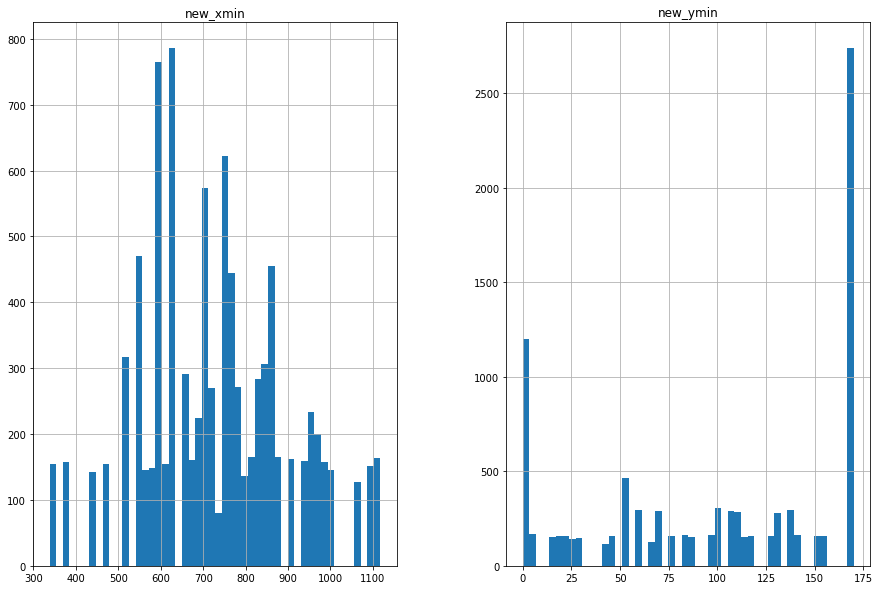

In [65]:
updated_box_all.iloc[:,9:11].hist(bins=50,figsize=(15,10))

In [66]:
#extracting coordinates - has duplicate values but no issue
#final_df = pd.concat([updated_box_all["filename"], updated_box_all["x_centre_avg"], updated_box_all["y_centre_avg"]], axis = 1)
final_df = updated_box_all
final_df.to_csv("C:/Users/Kanav/Documents/Dissertation/Parkinsons_Disease/Codes/Boundingbox_dim_files/file_with_updated_centres.csv")

print("File is extracted!! But remove dups from the extracted file manually")

File is extracted!! But remove dups from the extracted file manually
